In [2]:
import os
from hsflfm.util import load_dictionary
from hsflfm.analysis import ResultManager, ResultPlotter
import numpy as np
import plotly.graph_objects as go

In [5]:
def get_filename(specimen_number, strike_number):
    filename = f"../temporary_result_storage_5/{specimen_number}/strike_{strike_number}_results.json"
    filename = f"../complete_results_20241227/{specimen_number}/strike_{strike_number}_results.json"
    filename = f"../temp_redone_results_p/{specimen_number}/strike_{strike_number}_results.json"
    filename = f"../complete_results_20241227/{specimen_number}/strike_{strike_number}_results.json"
    assert os.path.exists(filename)
    return filename

In [10]:
specimen_number = "20240503_OB_4"
strike_number = 3

#specimen_number = "20220422_OB_1"
#strike_number = 3
result = load_dictionary(get_filename(specimen_number, strike_number))

In [11]:
rm = ResultManager(result.copy())

locations = rm.point_start_locs_ant_mm[:, None, :]
displacements = rm.rel_displacements 
locations = np.asarray(locations + displacements)

In [14]:
import plotly.graph_objects as go
import numpy as np

# locations is a 3d array holding the locations of all points (ideally in the ant coordiante system but any system should be okay)
# shape is (# points, # frames, 3)

n_frames = locations.shape[1]
t = np.arange(n_frames)

frames = []
# Generate data for each frame
for frame in range(n_frames):
    x = locations[:, frame, 0]
    y = locations[:, frame, 1]
    z = locations[:, frame, 2]
    x_ = locations[:, 0, 0]
    y_ = locations[:, 0, 1]
    z_ = locations[:, 0, 2]
    
    frames.append(go.Frame(data=[
        go.Mesh3d(z=z, x=x, y=y, opacity=1, color='red', name="mesh"),
        go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=1, color='black')),

        # can remove these to hide the start location
        #go.Mesh3d(z=z_, x=x_, y=y_, opacity=0.2, color='blue', name="start position"),
        #go.Scatter3d(x=x_, y=y_, z=z_, mode='markers', marker=dict(size=1, color='black'))
        ],
        name=f'frame{frame}'
    ))

# Create the figure
fig = go.Figure(
    data=frames[0].data,
    frames=frames
)

xmin = np.min(locations[:, :, 0]) - 0.05
xmax = np.max(locations[:, :, 0]) + 0.05
ymin = np.min(locations[:, :, 1]) - 0.05
ymax = np.max(locations[:, :, 1]) + 0.05 
zmin = np.min(locations[:, :, 2]) - 0.05 
zmax = np.max(locations[:, :, 2]) + 0.05

# Configure the layout
fig.update_layout(
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {'frame': {'duration': 250, 'redraw': True}, 'fromcurrent': True, 'mode': 'immediate'}]
        }]
    }],
    sliders=[{
        'active': 0,
        'yanchor': 'top',
        'xanchor': 'left',
        'currentvalue': {
            'font': {'size': 16},
            'prefix': 'Frame: ',
            'visible': True,
            'xanchor': 'right'
        },
        'transition': {'duration': 300, 'easing': 'cubic-in-out'},
        'pad': {'b': 10, 't': 50},
        'len': 0.9,
        'x': 0.1,
        'y': 0,
        'steps': [
            {
                'args': [
                    [f'frame{k}'],
                    {'frame': {'duration': 300, 'redraw': True},
                     'mode': 'immediate',
                     'transition': {'duration': 300}}
                ],
                'label': str(k),
                'method': 'animate'
            } for k in range(n_frames)
        ]
    }],
    scene=dict(
        aspectmode="data",
        xaxis=dict(range=[xmin, xmax], autorange=False),
        yaxis=dict(range=[ymin, ymax], autorange=False),
        zaxis=dict(range=[zmin, zmax], autorange=False),
        aspectratio=dict(x=1, y=1, z=1)
    )
)

fig.show()


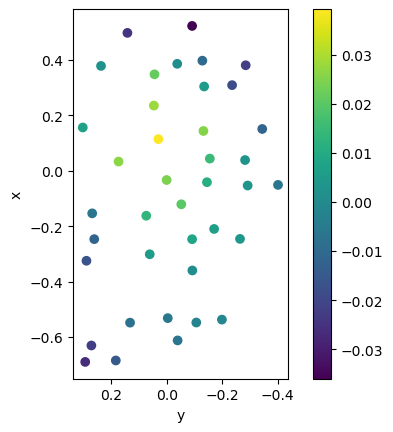

In [15]:
import torch
plotter = ResultPlotter(result, good_indices=torch.where(rm.error_scores <= 0.0015))
plotter.scatter_peak_disp()
#ax = plt.gca() 

In [20]:
vid = plotter.get_arrow_video(good_only=False)

98it [00:21,  4.55it/s]


<Figure size 640x480 with 0 Axes>

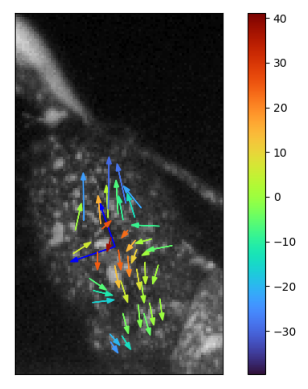

In [24]:
from hsflfm.util import play_video 
play_video(vid)

In [27]:
folder = "C:/users/Clare/Downloads"
assert os.path.exists(folder )
np.save(folder + '/i5.npy', vid )